<a href="https://colab.research.google.com/github/adeviney/Advent-of-Code/blob/main/Day7_Treachery_of_Whales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 7: The Treachery of Whales


In [6]:
from statistics import mode, median, mean
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
def read_file(filename = 'day7input.txt'):
  with open(filename) as f:
    nums = [int (x) for x in f.read().split(',')]
  return nums

## Part 1

In [8]:
def fuel_usage(h_positions, num):
  sum =0 
  for x in h_positions:
    sum += abs(x - num)
  return sum

In [9]:
test_data = [16,1,2,0,4,2,7,1,2,14]

In [10]:
real_data = read_file()

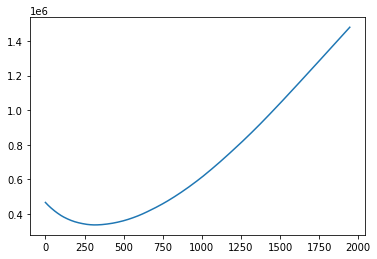

In [11]:
NUM = max(real_data)
x = range(NUM)
y = [fuel_usage(real_data, x) for x in range(NUM)]
plt.plot(x, y)

In [12]:
# minimum fuel usage
min(y)

336721

In [13]:
# at this horizontal position
y.index(min(y))

316

## Part 2

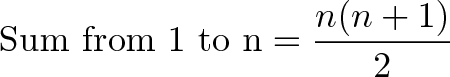

Image Credit: https://betterexplained.com/articles/techniques-for-adding-the-numbers-1-to-100/

In [14]:
def fuel_usage(h_positions, num):
  sum =0 
  for x in h_positions:
    sum += abs(x - num) * (abs(x - num) + 1)/2
  return sum

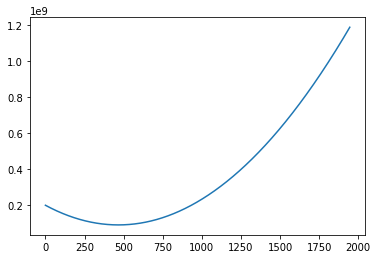

In [15]:
NUM = max(real_data)
x = range(NUM)
y = [fuel_usage(real_data, x) for x in range(NUM)]
plt.plot(x, y)

In [16]:
#minimum fuel usage
min(y)

91638945.0

In [17]:
# at this horizontal position
y.index(min(y))

466

## Another way (not brute force)
So it appears there is just one minimum on the graph -- this is the point at which the fuel usage is the smallest. I should be able to find this point and minimize the amount of checks I have to do.

First I will start at the median and check the fuel cost of the positions immediately to the left and right.

If the fuel cost of the median is the smallest, we found the answer immediately.

If not, we note whether going to the left or right yielded a smaller answer. That direction is the direction in which we will find the minima, so will continue to go in that direction until we reach a point that is lower than it subsequent point (this will be the minimum)

In [18]:
def find_minimum_fuel(data):
  x = median(data)
  y = x - 1 # immediately to the left of median
  z = x + 1 # immediately to the right of median

  x_fuel = fuel_usage(data, x)
  y_fuel = fuel_usage(data, y)
  z_fuel = fuel_usage(data, z)
  fuel_checks = 3

  if min(x_fuel, y_fuel, z_fuel) == x_fuel:
    print("the median is the answer")
    return x_fuel
  elif (z_fuel < x_fuel):
    change = 1
    previous = z
  else:
    change = -1
    previous = y

  fuel_previous = fuel_usage(data, previous)
  new = fuel_usage(data, previous + change)
  fuel_checks += 2
  
  while(fuel_previous > new):
    previous += change
    fuel_previous = new
    new = fuel_usage(data, previous + change)
    fuel_checks += 1

  print(f"This function found the answer in {fuel_checks} checks compared to {len(data)} checks with brute force above")
  return fuel_usage(data, previous)

In [19]:
find_minimum_fuel(real_data)

This function found the answer in 154 checks compared to 1000 checks with brute force above


91638945.0